### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from ast import literal_eval
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

### Read Embedding File

In [2]:
fpath = 'data/article_title_embeddings.csv'
articles = pd.read_csv(fpath)
articles.columns,\
articles.shape

(Index(['Article Number', 'Article Title', 'Part', 'Part Title',
        'article_title_word_count', 'article_title_embeddings'],
       dtype='object'),
 (498, 6))

### Clustering Embeddings using K-Means

In [3]:
embedding_matrix = np.array(articles.article_title_embeddings.apply(literal_eval).to_list())
embedding_matrix.shape

(498, 1536)

In [4]:
n_clusters_range = list(range(2, 25))
kmeans_scores = []

for n_clusters in tqdm(n_clusters_range):
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(embedding_matrix)

    kmeans_scores.append(kmeans.inertia_)

  0%|          | 0/23 [00:00<?, ?it/s]

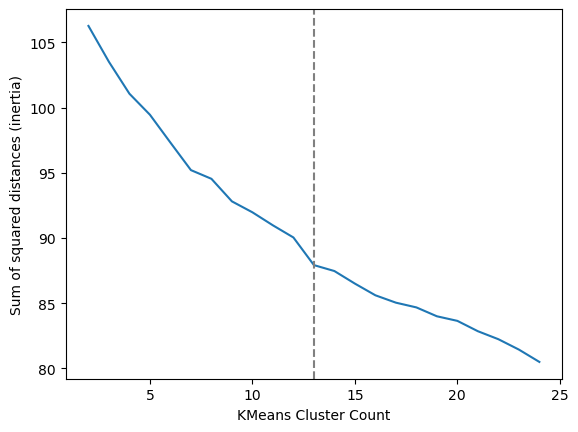

In [5]:
sns.lineplot(x=n_clusters_range, y=kmeans_scores, )
plt.xlabel('KMeans Cluster Count')
plt.ylabel('Sum of squared distances (inertia)')
plt.axvline(x=13, color='gray', linestyle='--')

In [6]:
kmeans = KMeans(n_clusters = 13, init='k-means++', n_init='auto', random_state=42)
kmeans.fit(embedding_matrix)
articles['Cluster'] = kmeans.labels_

### TSNE

In [7]:
%%time

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(embedding_matrix)
vis_dims.shape

CPU times: total: 12.6 s
Wall time: 939 ms


(498, 2)

### Plotting Embeddings

In [8]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
cluster_id = articles['Cluster'].values

Text(0.5, 1.0, 'tSNE Plot (KMeans)')

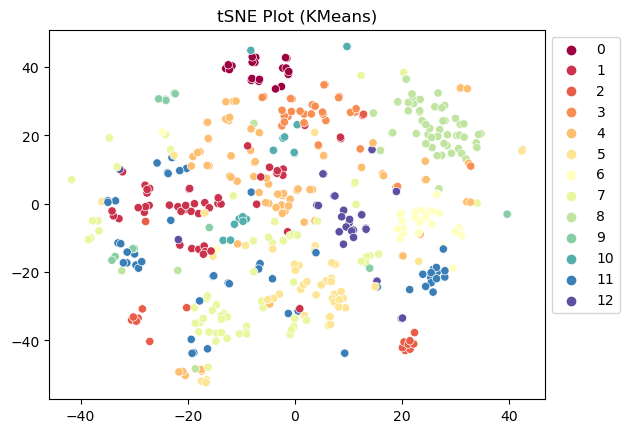

In [9]:
ax = sns.scatterplot(x=x, y=y, hue=cluster_id, palette='Spectral', legend='full', )
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('tSNE Plot (KMeans)')

Text(0.5, 1.0, 'tSNE Plot (Article Parts)')

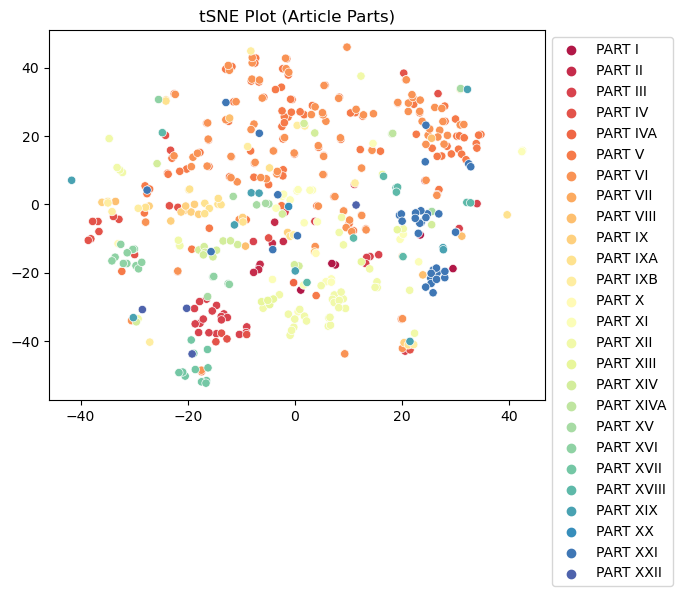

In [10]:
article_parts_as_clusters = articles.Part.values
ax = sns.scatterplot(x=x, y=y, hue=article_parts_as_clusters, palette='Spectral', legend='full', )
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('tSNE Plot (Article Parts)')

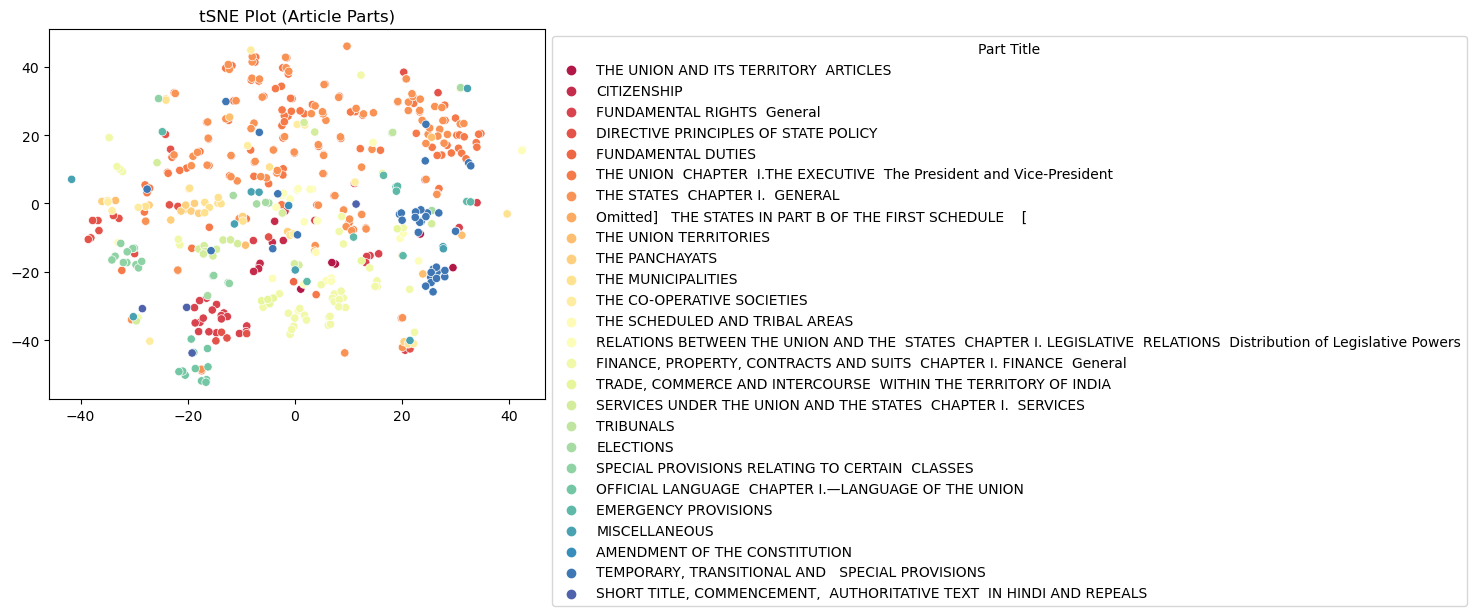

In [11]:
article_parts_title_as_clusters = articles['Part Title']
ax = sns.scatterplot(x=x, y=y, hue=article_parts_title_as_clusters, palette='Spectral', legend='full', )
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('tSNE Plot (Article Parts)')
plt.savefig('title_parts_as_tsne_clusters.png', bbox_inches='tight')